<a href="https://colab.research.google.com/github/abdullatifm1127/PCVK_GANJIL_2025/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pytesseract

In [4]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

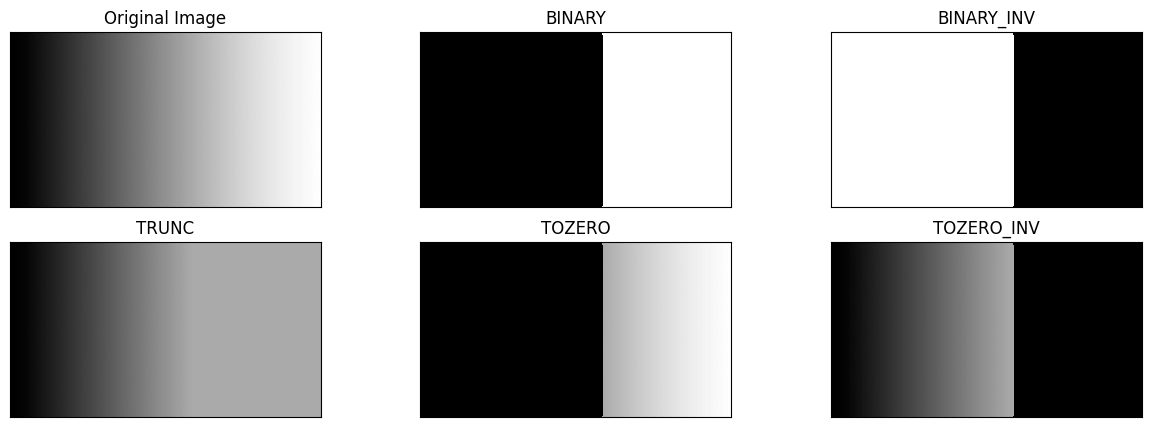

In [9]:
filename= ('/content/drive/MyDrive/Tugas PCVK/gradient.jpg')
img = cv2.imread(filename)
thresh1 = cv2.imread(filename)
thresh2 = cv2.imread(filename)
thresh3 = cv2.imread(filename)
thresh4 = cv2.imread(filename)
thresh5 = cv2.imread(filename)
thresh = 170

thresh1[img>thresh] = 255
thresh1[img<=thresh] = 0

thresh2 = 255 - thresh1

thresh3[img>thresh] = thresh

thresh4[img<=thresh] = 0

thresh5[img>thresh] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1), plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

Nilai threshold Otsu: 167


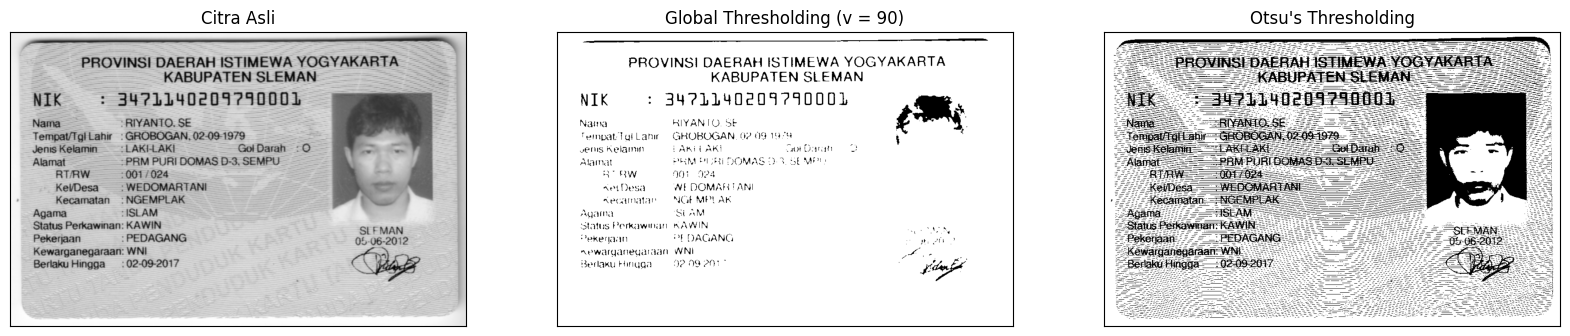

In [16]:
filename = ('/content/drive/MyDrive/Tugas PCVK/ktp.png')
img = cv2.imread(filename, 0)
blur = cv2.GaussianBlur(img, (5,5), 0)

def otsu(gray):
  pixel_number = gray.shape[0]*gray.shape[1]
  mean_weight = 1.0/pixel_number
  his, bins = np.histogram(gray, np.arange(0,257))
  final_thresh = -1
  final_value = -1
  intensity_arr = np.arange(256)

  for t in bins[1:-1]:
    pcb = np.sum(his[:t])
    pcf = np.sum(his[t:])
    if pcb == 0 or pcf == 0:
      continue
    Wb = pcb*mean_weight
    Wf = pcf*mean_weight
    mub = np.sum(intensity_arr[:t]*his[:t])/float(pcb)
    muf = np.sum(intensity_arr[t:]*his[t:])/float(pcf)

    value = Wb * Wf * (mub - muf)**2
    if value > final_value:
      final_thresh = t
      final_value = value

  print("Nilai threshold Otsu:", final_thresh)

  final_img = gray.copy()
  final_img[gray > final_thresh] = 255
  final_img[gray <= final_thresh] = 0
  return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)

x = ("Otsu's Thresholding")

ret, th1 = cv2.threshold(blur, 90, 255, cv2.THRESH_BINARY)

titles = ('Citra Asli', 'Global Thresholding (v = 90)', x)
citra3 = [blur, th1, otsu_biner]

plt.figure(figsize = (20,15))
for i in range(len(citra3)):
  plt.subplot(1, 3, i+1)
  plt.imshow(citra3[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

plt.show()

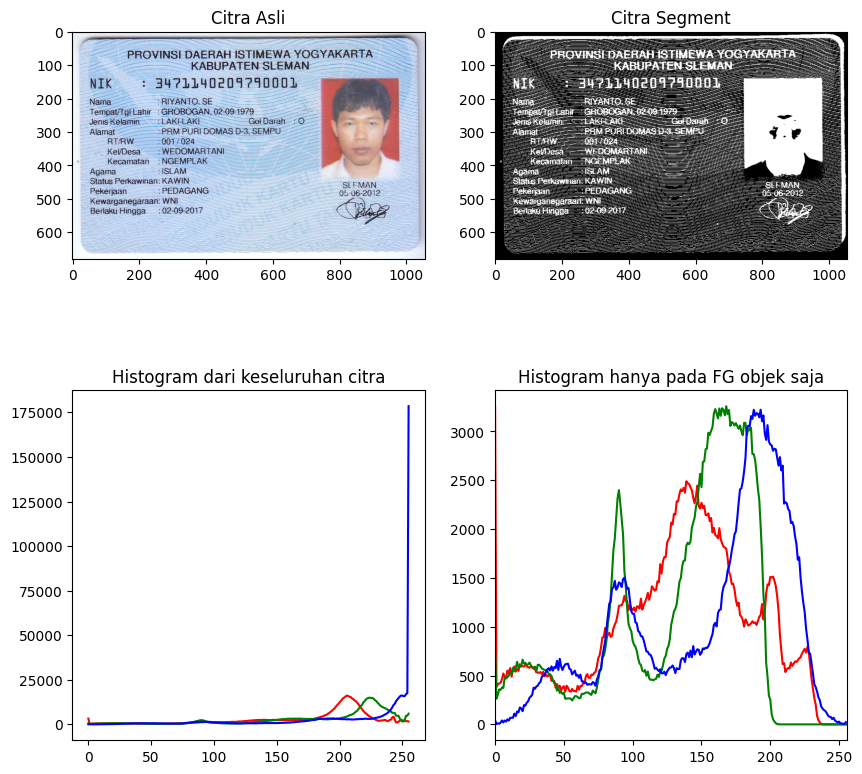

In [18]:
filename = ('/content/drive/MyDrive/Tugas PCVK/ktp.png')

img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret3, mask = cv2.threshold(img_gray, 200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask,'gray')
plt.title('Citra Segment')

colors = ('r', 'g', 'b')

for i, col in enumerate(colors):
  hist0 = cv2.calcHist([img],[i],None,[256],[0,256])
  plt.subplot(2,2,3),plt.plot(hist0, color = col)
  plt.title('Histogram dari keseluruhan citra')

  hist1 = cv2.calcHist([img],[i],mask,[256],[0,256])
  plt.subplot(2,2,4), plt.plot(hist1, color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0, 256])

plt.show()